In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
import h5py
from keras.models import load_model
def load_positive_data(cell):
    file_name_cell = '../' + cell + '_all_data_hilbert_without_aug.h5'
    with h5py.File(file_name_cell, 'r') as hf:
        dataset_enhancer = np.array(hf.get('enhancers'))
        dataset_promoter = np.array(hf.get('promoters'))
        labels = np.array(hf.get('labels'))

    pos = 0
    for i in range(len(labels)):
        if labels[i] == 1:
            pos += 1

    pos_enh = dataset_enhancer[:pos]
    pos_pro = dataset_promoter[:pos]
    
    return pos_enh,pos_pro

ImportError: cannot import name '_minimize_trustregion_constr' from 'scipy.optimize._trustregion_constr' (unknown location)

In [2]:
cell = 'IMR90'
pos_enh,pos_pro = load_positive_data(cell)
model = load_model('../%s_bestmodel.h5' % cell)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 64, 64, 4)    0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 64, 64, 4)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 16, 16, 64)   6464        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 16, 16, 64)   6464        input_2[0][0]                    
__________________________________________________________________________________________________
max_poolin

In [4]:
# 保存模型的图片
from keras.utils import plot_model
plot_model(model, to_file='model.png')

In [1]:
from vis.visualization import visualize_cam
enh = np.array(pos_enh[35])
pro = np.array(pos_pro[35])
print(enh.shape)
print(type(pos_enh[35]))

ModuleNotFoundError: No module named 'vis.visualization'

In [6]:
from vis.visualization import visualize_cam
from vis.utils import utils
from keras.models import Model

conv2d_model_enh = Model(inputs=model.input[0],outputs=model.get_layer('conv2d_2').output)
conv2d_model_pro = Model(inputs=model.input[1],outputs=model.get_layer('conv2d_4').output)
conv2d_model_enh.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 4)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        6464      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
Total params: 80,320
Trainable params: 80,320
Non-trainable params: 0
_________________________________________________________________


In [7]:
last_conv_layer_idx_enh = utils.find_layer_idx(conv2d_model_enh, 'conv2d_2')
print(last_conv_layer_idx_enh)
last_conv_layer_idx_pro = utils.find_layer_idx(conv2d_model_pro, 'conv2d_4')
print(last_conv_layer_idx_pro)

3
3


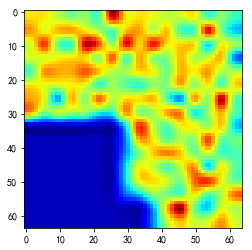

In [8]:
heat_map_enh = visualize_cam(conv2d_model_enh, last_conv_layer_idx_enh, None, enh)
heat_map_pro = visualize_cam(conv2d_model_pro, last_conv_layer_idx_pro, None, pro)

plt.imshow(heat_map_enh)
plt.savefig('sample_heatmap_enh.png')

In [3]:
plt.imshow(heat_map_pro)
plt.savefig('sample_heatmap_pro.png')

NameError: name 'heat_map_pro' is not defined

In [9]:
from vis.utils import utils
last_conv_layer_idx_enh = utils.find_layer_idx(conv2d_model_enh, 'conv2d_2')
last_conv_layer_idx_pro = utils.find_layer_idx(conv2d_model_pro, 'conv2d_4')
print(last_conv_layer_idx_enh)
print(last_conv_layer_idx_pro)

6


In [13]:
print(len(pos_enh))
drawn_heatmap = 0
for i in range(0,len(pos_enh)):
    img_enh = np.array(pos_enh[i])
    img_pro = np.array(pos_pro[i])
    heat_map_enh = visualize_cam(conv2d_model_enh, last_conv_layer_idx_enh, None, img_enh)
    heat_map_pro = visualize_cam(conv2d_model_pro, last_conv_layer_idx_pro, None, img_pro)
    
    plt.imshow(heat_map_enh)
    plt.savefig('heatmaps/'+ cell + '/heatmap_pos_enh_' + str(i) + '.png')
    
    plt.imshow(heat_map_pro)
    plt.savefig('heatmaps/'+ cell + '/heatmap_pos_pro_' + str(i) + '.png')
    plt.gcf().clear()
    
    print("Mapped and Drawn: {}".format(i))
    drawn_heatmap += 1
print('finish!')

1254
Mapped and Drawn: 0
Mapped and Drawn: 1
Mapped and Drawn: 2
Mapped and Drawn: 3
Mapped and Drawn: 4
Mapped and Drawn: 5
Mapped and Drawn: 6
Mapped and Drawn: 7
Mapped and Drawn: 8
Mapped and Drawn: 9
Mapped and Drawn: 10
Mapped and Drawn: 11
Mapped and Drawn: 12
Mapped and Drawn: 13
Mapped and Drawn: 14
Mapped and Drawn: 15
Mapped and Drawn: 16
Mapped and Drawn: 17
Mapped and Drawn: 18
Mapped and Drawn: 19
Mapped and Drawn: 20
Mapped and Drawn: 21
Mapped and Drawn: 22
Mapped and Drawn: 23
Mapped and Drawn: 24
Mapped and Drawn: 25
Mapped and Drawn: 26
Mapped and Drawn: 27
Mapped and Drawn: 28
Mapped and Drawn: 29
Mapped and Drawn: 30
Mapped and Drawn: 31
Mapped and Drawn: 32
Mapped and Drawn: 33
Mapped and Drawn: 34
Mapped and Drawn: 35
Mapped and Drawn: 36
Mapped and Drawn: 37
Mapped and Drawn: 38
Mapped and Drawn: 39
Mapped and Drawn: 40
Mapped and Drawn: 41
Mapped and Drawn: 42
Mapped and Drawn: 43
Mapped and Drawn: 44
Mapped and Drawn: 45
Mapped and Drawn: 46
Mapped and Drawn: 

Mapped and Drawn: 378
Mapped and Drawn: 379
Mapped and Drawn: 380
Mapped and Drawn: 381
Mapped and Drawn: 382
Mapped and Drawn: 383
Mapped and Drawn: 384
Mapped and Drawn: 385
Mapped and Drawn: 386
Mapped and Drawn: 387
Mapped and Drawn: 388
Mapped and Drawn: 389
Mapped and Drawn: 390
Mapped and Drawn: 391
Mapped and Drawn: 392
Mapped and Drawn: 393
Mapped and Drawn: 394
Mapped and Drawn: 395
Mapped and Drawn: 396
Mapped and Drawn: 397
Mapped and Drawn: 398
Mapped and Drawn: 399
Mapped and Drawn: 400
Mapped and Drawn: 401
Mapped and Drawn: 402
Mapped and Drawn: 403
Mapped and Drawn: 404
Mapped and Drawn: 405
Mapped and Drawn: 406
Mapped and Drawn: 407
Mapped and Drawn: 408
Mapped and Drawn: 409
Mapped and Drawn: 410
Mapped and Drawn: 411
Mapped and Drawn: 412
Mapped and Drawn: 413
Mapped and Drawn: 414
Mapped and Drawn: 415
Mapped and Drawn: 416
Mapped and Drawn: 417
Mapped and Drawn: 418
Mapped and Drawn: 419
Mapped and Drawn: 420
Mapped and Drawn: 421
Mapped and Drawn: 422
Mapped and

Mapped and Drawn: 751
Mapped and Drawn: 752
Mapped and Drawn: 753
Mapped and Drawn: 754
Mapped and Drawn: 755
Mapped and Drawn: 756
Mapped and Drawn: 757
Mapped and Drawn: 758
Mapped and Drawn: 759
Mapped and Drawn: 760
Mapped and Drawn: 761
Mapped and Drawn: 762
Mapped and Drawn: 763
Mapped and Drawn: 764
Mapped and Drawn: 765
Mapped and Drawn: 766
Mapped and Drawn: 767
Mapped and Drawn: 768
Mapped and Drawn: 769
Mapped and Drawn: 770
Mapped and Drawn: 771
Mapped and Drawn: 772
Mapped and Drawn: 773
Mapped and Drawn: 774
Mapped and Drawn: 775
Mapped and Drawn: 776
Mapped and Drawn: 777
Mapped and Drawn: 778
Mapped and Drawn: 779
Mapped and Drawn: 780
Mapped and Drawn: 781
Mapped and Drawn: 782
Mapped and Drawn: 783
Mapped and Drawn: 784
Mapped and Drawn: 785
Mapped and Drawn: 786
Mapped and Drawn: 787
Mapped and Drawn: 788
Mapped and Drawn: 789
Mapped and Drawn: 790
Mapped and Drawn: 791
Mapped and Drawn: 792
Mapped and Drawn: 793
Mapped and Drawn: 794
Mapped and Drawn: 795
Mapped and

Mapped and Drawn: 1119
Mapped and Drawn: 1120
Mapped and Drawn: 1121
Mapped and Drawn: 1122
Mapped and Drawn: 1123
Mapped and Drawn: 1124
Mapped and Drawn: 1125
Mapped and Drawn: 1126
Mapped and Drawn: 1127
Mapped and Drawn: 1128
Mapped and Drawn: 1129
Mapped and Drawn: 1130
Mapped and Drawn: 1131
Mapped and Drawn: 1132
Mapped and Drawn: 1133
Mapped and Drawn: 1134
Mapped and Drawn: 1135
Mapped and Drawn: 1136
Mapped and Drawn: 1137
Mapped and Drawn: 1138
Mapped and Drawn: 1139
Mapped and Drawn: 1140
Mapped and Drawn: 1141
Mapped and Drawn: 1142
Mapped and Drawn: 1143
Mapped and Drawn: 1144
Mapped and Drawn: 1145
Mapped and Drawn: 1146
Mapped and Drawn: 1147
Mapped and Drawn: 1148
Mapped and Drawn: 1149
Mapped and Drawn: 1150
Mapped and Drawn: 1151
Mapped and Drawn: 1152
Mapped and Drawn: 1153
Mapped and Drawn: 1154
Mapped and Drawn: 1155
Mapped and Drawn: 1156
Mapped and Drawn: 1157
Mapped and Drawn: 1158
Mapped and Drawn: 1159
Mapped and Drawn: 1160
Mapped and Drawn: 1161
Mapped and 

<Figure size 432x288 with 0 Axes>

In [40]:
# last_conv_layer = model.get_layer('conv2d_2')
last_conv_layer = 'conv2d_2'
last_conv_layer2 = 'conv2d_4'
enh = np.array(pos_enh[35])
pro = np.array(pos_pro[35])

enh = np.expand_dims(enh, axis=0)
pro = np.expand_dims(pro, axis=0)

In [41]:
enh.shape

(1, 64, 64, 4)

In [43]:
from keras import backend as K
def output_heatmap(model, last_conv_layer, img):
    """Get the heatmap for image.

    Args:
           model: keras model.
           last_conv_layer: name of last conv layer in the model.
           img: processed input image.

    Returns:
           heatmap: heatmap.
    """
    # predict the image class
    preds = model.predict(img)
    # find the class index
    index = np.argmax(preds[0])
    # This is the entry in the prediction vector
    target_output = model.output[:, index]

    # get the last conv layer
    last_conv_layer = model.get_layer(last_conv_layer)

    # compute the gradient of the output feature map with this target class
    grads = K.gradients(target_output, last_conv_layer.output)[0]

    # mean the gradient over a specific feature map channel
    pooled_grads = K.mean(grads, axis=(0, 1, 2))

    # this function returns the output of last_conv_layer and grads 
    # given the input picture
    iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
    pooled_grads_value, conv_layer_output_value = iterate([img])

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the target class

    for i in range(conv_layer_output_value.shape[-1]):
        conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

    # The channel-wise mean of the resulting feature map
    # is our heatmap of class activation
    heatmap = np.mean(conv_layer_output_value, axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)

    return heatmap


In [49]:
import matplotlib.pyplot as plt
conv2d_layer_model = Model(inputs=model.input[0],outputs=model.get_layer('conv2d_2').output)
heatmap = output_heatmap(conv2d_layer_model, last_conv_layer, enh)
# plt.matshow(heatmap)

ValueError: slice index 984 of dimension 1 out of bounds. for 'strided_slice_11' (op: 'StridedSlice') with input shapes: [?,4,4,128], [2], [2], [2] and with computed input tensors: input[1] = <0 984>, input[2] = <0 985>, input[3] = <1 1>.